In [38]:

import mysql.connector
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Connecting to DB

In [39]:

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="movie"
)
cursor = db.cursor()
cursor.execute("SELECT * FROM reviews")
results = cursor.fetchall()

df = pd.DataFrame(results, columns=["review_id", "review", "sentiment"])

cursor.close()
db.close()

df.head()

,review_id,review,sentiment
0,44805,One of the other reviewers has mentioned that ...,positive
1,44806,A wonderful little production. <br /><br />The...,positive
2,44807,I thought this was a wonderful way to spend ti...,positive
3,44808,Basically there's a family where a little boy ...,negative
4,44809,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Cleaning

In [51]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    text_tokens = text.split()
    text = ' '.join([word for word in text_tokens if word not in stop_words])
    
    return text

In [52]:
df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_4168\2749030157.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review_id,review,sentiment,cleaned_review,review_length
0,44805,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...,1761
1,44806,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,998
2,44807,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,926
3,44808,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,748
4,44809,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1317


# EDA

In [42]:
print("Dataset Overview: ")
print(df.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_id       50000 non-null  int64 
 1   review          50000 non-null  object
 2   sentiment       50000 non-null  object
 3   cleaned_review  50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None


In [43]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
review_id         0
review            0
sentiment         0
cleaned_review    0
dtype: int64


In [44]:
df['review_length'] = df['review'].apply(len)
print(df.describe())

          review_id  review_length
count  50000.000000   50000.000000
mean   69804.500000    1309.431020
std    14433.901067     989.728014
min    44805.000000      32.000000
25%    57304.750000     699.000000
50%    69804.500000     970.000000
75%    82304.250000    1590.250000
max    94804.000000   13704.000000


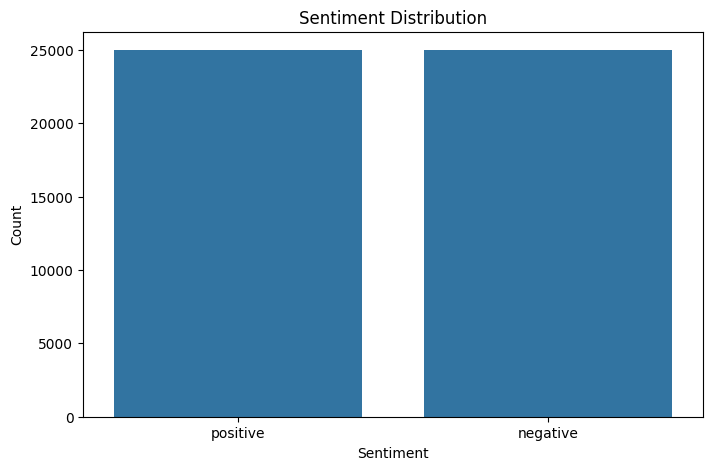

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [46]:
avg_review_length = df.groupby('sentiment')['review_length'].mean()
print("Average Review Length:")
print(avg_review_length)

Average Review Length:
sentiment
negative    1294.06436
positive    1324.79768
Name: review_length, dtype: float64


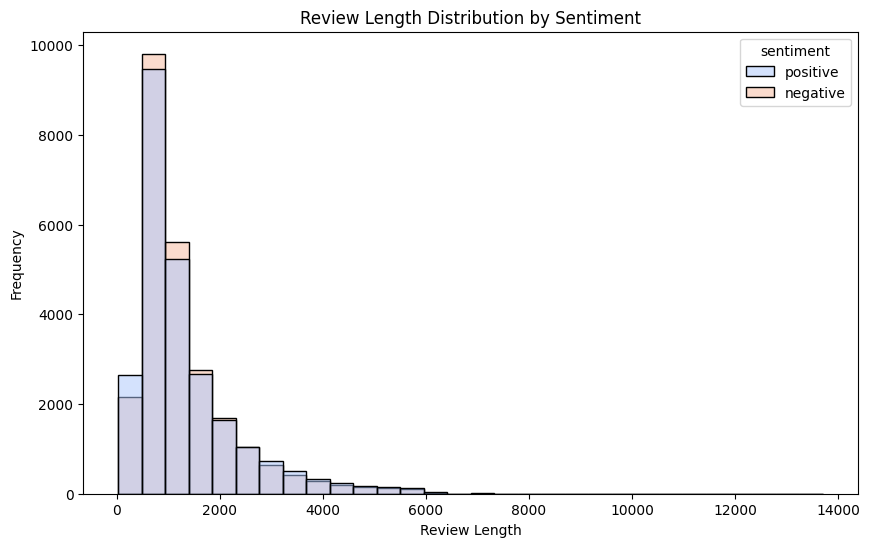

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=30, palette='coolwarm')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [48]:
positive_clean = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_clean = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

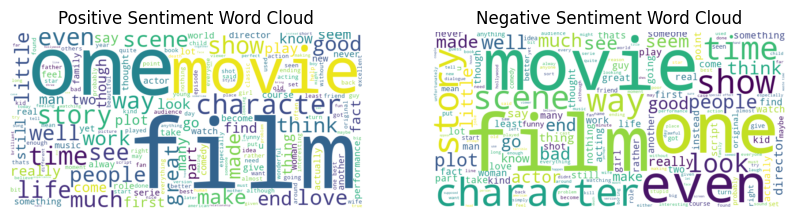

In [49]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_clean)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_clean)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()

In [50]:
df.to_csv('clean_data.csv', index=False)